In [97]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
sns.set_theme(rc={'figure.dpi': 72, 'savefig.dpi': 300,
              'figure.autolayout': True})
sns.set_style('ticks')
sns.set_context('paper')

In [98]:
# Load the dataset.
df = pd.read_csv('lungcancer.csv')
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

# Preprocess
X['GENDER'] = X['GENDER'] == 'M'
y = y == 'YES'

for c in X.columns:
    if c == 'GENDER' or c == 'AGE':
        continue
    X[c] = X[c] == 2

In [99]:
# Part e
import sklearn as skl


def skl_eval(iterations, train_splits):
    for ts in train_splits:
        scores = []
        for it in range(iterations):
            print(f'Results for iteration {it + 1} with train size {ts*100:.0f}%:')
            X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(
                X, y, train_size=ts, shuffle=True)
            skdt = skl.tree.DecisionTreeClassifier(criterion='entropy')
            skdt.fit(X_train, y_train)
            y_pred = skdt.predict(X_test)
            acc = skl.metrics.accuracy_score(y_test, y_pred)
            scores.append(acc)
            print('Accuracy:', round(acc, 4))
            print('Confusion Matrix:')
            print(skl.metrics.confusion_matrix(y_test, y_pred))
            print('Depth:', skdt.get_depth())
            print('Number of nodes:', skdt.tree_.node_count)
            print('Number of leaves:', skdt.get_n_leaves())
            print()
            if iterations == 1:
                skl.tree.plot_tree(skdt, feature_names=X.columns, class_names=['NO', 'YES'], filled=True)
                plt.savefig('P3_e_a.png')
                plt.show()
        if iterations > 1:
            m = round(np.mean(scores), 4)
            s = round(np.std(scores), 4)
            print(f'Average accuracy of {iterations} iterations with train size {ts*100:.0f}%: {m} ± {s}')
            print('\n')


Results for iteration 1 with train size 25%:
Accuracy: 0.8578
Confusion Matrix:
[[ 20   8]
 [ 25 179]]
Depth: 5
Number of nodes: 21
Number of leaves: 11



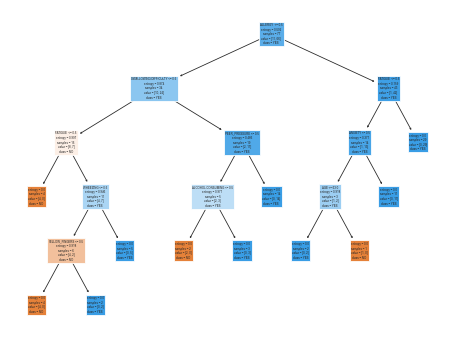

In [100]:
# Part e.a
skl_eval(1, [0.25])

In [101]:
# Part e.b
skl_eval(7, [0.25])

Results for iteration 1 with train size 25%:
Accuracy: 0.875
Confusion Matrix:
[[ 16  15]
 [ 14 187]]
Depth: 5
Number of nodes: 23
Number of leaves: 12

Results for iteration 2 with train size 25%:
Accuracy: 0.8922
Confusion Matrix:
[[ 16  12]
 [ 13 191]]
Depth: 6
Number of nodes: 23
Number of leaves: 12

Results for iteration 3 with train size 25%:
Accuracy: 0.8319
Confusion Matrix:
[[ 15  16]
 [ 23 178]]
Depth: 6
Number of nodes: 27
Number of leaves: 14

Results for iteration 4 with train size 25%:
Accuracy: 0.8621
Confusion Matrix:
[[ 15  12]
 [ 20 185]]
Depth: 5
Number of nodes: 17
Number of leaves: 9

Results for iteration 5 with train size 25%:
Accuracy: 0.8879
Confusion Matrix:
[[ 13  19]
 [  7 193]]
Depth: 5
Number of nodes: 15
Number of leaves: 8

Results for iteration 6 with train size 25%:
Accuracy: 0.8707
Confusion Matrix:
[[ 18   9]
 [ 21 184]]
Depth: 8
Number of nodes: 33
Number of leaves: 17

Results for iteration 7 with train size 25%:
Accuracy: 0.8405
Confusion Matrix:

In [102]:
# Part e.c
skl_eval(7, [0.45, 0.65, 0.85])

Results for iteration 1 with train size 45%:
Accuracy: 0.7765
Confusion Matrix:
[[  6  17]
 [ 21 126]]
Depth: 8
Number of nodes: 35
Number of leaves: 18

Results for iteration 2 with train size 45%:
Accuracy: 0.8647
Confusion Matrix:
[[  8  15]
 [  8 139]]
Depth: 10
Number of nodes: 43
Number of leaves: 22

Results for iteration 3 with train size 45%:
Accuracy: 0.8647
Confusion Matrix:
[[  9  12]
 [ 11 138]]
Depth: 11
Number of nodes: 39
Number of leaves: 20

Results for iteration 4 with train size 45%:
Accuracy: 0.8882
Confusion Matrix:
[[ 13   8]
 [ 11 138]]
Depth: 8
Number of nodes: 39
Number of leaves: 20

Results for iteration 5 with train size 45%:
Accuracy: 0.8529
Confusion Matrix:
[[  7  15]
 [ 10 138]]
Depth: 7
Number of nodes: 31
Number of leaves: 16

Results for iteration 6 with train size 45%:
Accuracy: 0.9
Confusion Matrix:
[[  9  10]
 [  7 144]]
Depth: 9
Number of nodes: 43
Number of leaves: 22

Results for iteration 7 with train size 45%:
Accuracy: 0.8647
Confusion Matri

Optimal max depth for Train set: 8
Optimal max depth for Test set: 3
Maximum accuracy for Train set: 1.0
Maximum accuracy for Test set: 0.8718


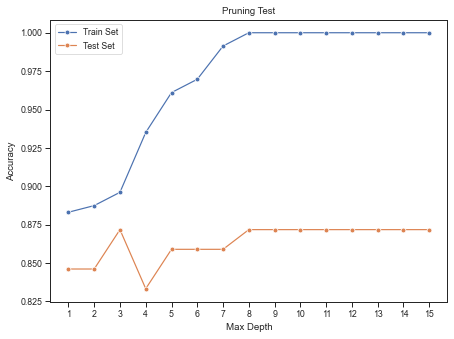

In [120]:
# Part e.d
max_depths = list(range(1, 16))
train_scores = []
test_scores = []

X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(
    X, y, train_size=0.75, shuffle=True, random_state=2)

for md in max_depths:
    skdt = skl.tree.DecisionTreeClassifier(criterion='entropy', max_depth=md, random_state=2)
    skdt.fit(X_train, y_train)
    train_scores.append(skdt.score(X_train, y_train))
    test_scores.append(skdt.score(X_test, y_test))

print('Optimal max depth for Train set:', max_depths[np.argmax(train_scores)])
print('Optimal max depth for Test set:', max_depths[np.argmax(test_scores)])
print('Maximum accuracy for Train set:', round(max(train_scores), 4))
print('Maximum accuracy for Test set:', round(max(test_scores), 4))

fig, ax = plt.subplots()
sns.lineplot(x=max_depths, y=train_scores, label='Train Set', marker='o', ax=ax)
sns.lineplot(x=max_depths, y=test_scores, label='Test Set', marker='o', ax=ax)
ax.set(
    title='Pruning Test',
    xlabel='Max Depth',
    ylabel='Accuracy',
    xticks=max_depths,
)
fig.savefig('P3_e_d.png')
plt.show()